# =======================================
# 💳 Credit Default Prediction using ANN
# =======================================

This notebook demonstrates how to predict the probability of credit card default using a deep learning model (ANN) built with TensorFlow and Keras.

In [1]:
# =======================================
# 📦 Import Libraries
# =======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

2025-04-16 13:10:27.427737: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 13:10:28.053564: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 13:10:28.310029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744789228.584075    8521 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744789228.699535    8521 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744789229.094285    8521 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# =======================================
# 📁 Load and Preview Data
# =======================================
df = pd.read_excel('default_of_credit_card_clients.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# =======================================
# 🧹 Preprocessing
# =======================================
# Separate features and target
features = df.drop(columns=['ID', 'default payment next month'])
target = df['default payment next month']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# =======================================
# 🧠 Build ANN Model
# =======================================
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

/home/blackpanther/my_project/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-16 13:10:55.512502: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
# =======================================
# 🚀 Train the Model
# =======================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7511 - auc: 0.6350 - loss: 0.5393 - precision: 0.4562 - recall: 0.2300 - val_accuracy: 0.8077 - val_auc: 0.7040 - val_loss: 0.4673 - val_precision: 0.6673 - val_recall: 0.2600
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8130 - auc: 0.7319 - loss: 0.4567 - precision: 0.6766 - recall: 0.2965 - val_accuracy: 0.8153 - val_auc: 0.7398 - val_loss: 0.4511 - val_precision: 0.6580 - val_recall: 0.3436
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8198 - auc: 0.7556 - loss: 0.4427 - precision: 0.6779 - recall: 0.3413 - val_accuracy: 0.8168 - val_auc: 0.7514 - val_loss: 0.4445 - val_precision: 0.6575 - val_recall: 0.3587
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8270 - auc: 0.7684 - loss: 0.4292 - precision: 0.6833 - recall: 0.3786 - val_accuracy: 0.8157 - val_auc: 0.7547 - val_loss: 0.4445 - val_precision: 0.6545 - val_recall: 0.3527
Epoch 5/20
188/188 ━━━━━━━━━━━━━

In [6]:
# =======================================
# 📊 Evaluate the Model
# =======================================
print("\n📊 Evaluation Metrics:")
results = model.evaluate(X_test, y_test, verbose=0)
for name, val in zip(model.metrics_names, results):
    print(f"{name.capitalize()}: {val:.4f}")


📊 Evaluation Metrics:
Loss: 0.4358
Compile_metrics: 0.8182


In [7]:
# =======================================
# 🔮 Predict Probabilities and Classes
# =======================================
y_pred_prob = model.predict(X_test).flatten()
y_pred_class = (y_pred_prob > 0.5).astype(int)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


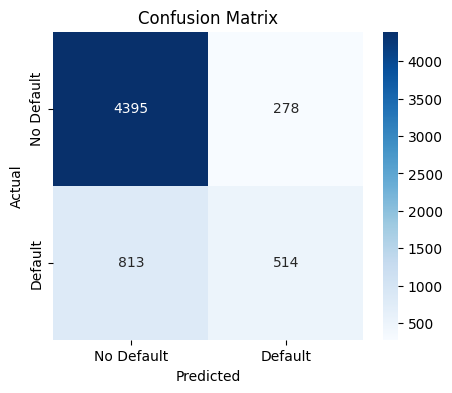

In [8]:
# =======================================
# 🔷 Confusion Matrix
# =======================================
conf_matrix = tf.math.confusion_matrix(y_test, y_pred_class).numpy()
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

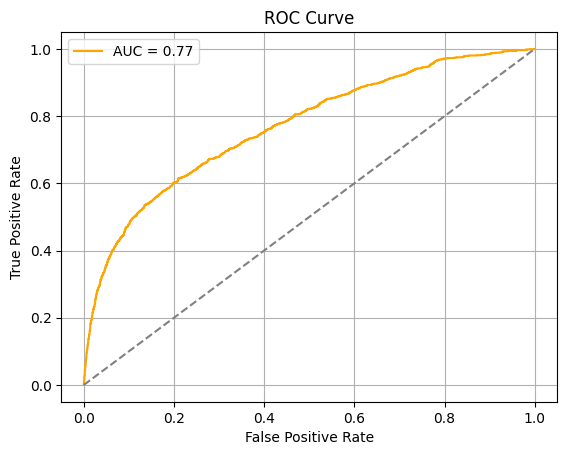

In [9]:
# =======================================
# 📈 ROC Curve and AUC
# =======================================
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.savefig("roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


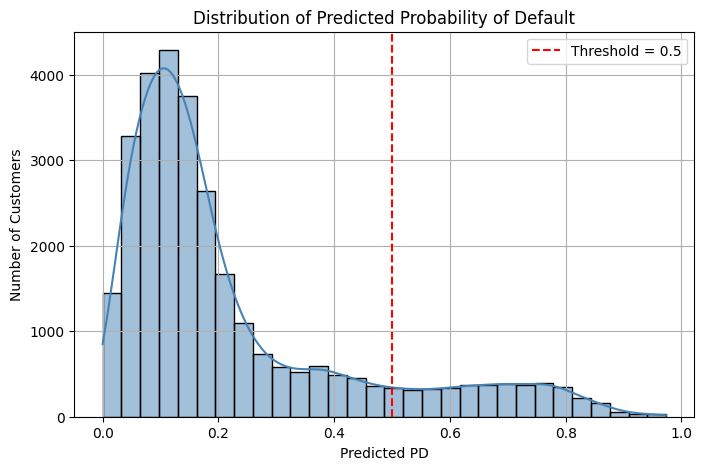

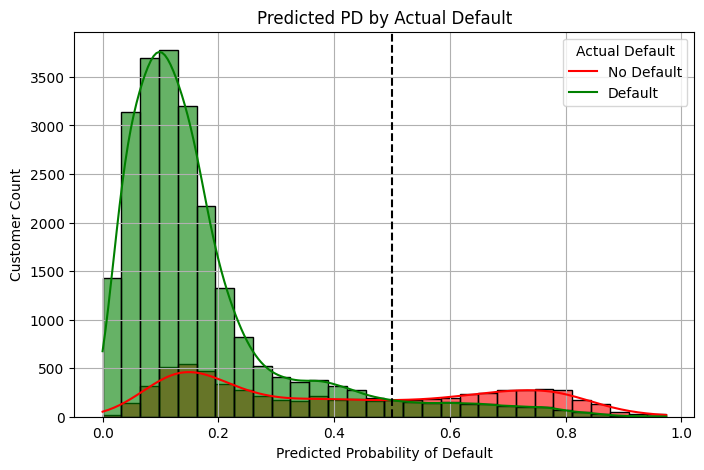

In [10]:
# =======================================
# 📊 Probability of Default (PD) for All Clients
# =======================================
df['predicted_pd'] = model.predict(scaler.transform(features)).flatten()

# === Histogram of PD ===
plt.figure(figsize=(8, 5))
sns.histplot(df['predicted_pd'], bins=30, kde=True, color='steelblue')
plt.axvline(0.5, color='red', linestyle='--', label="Threshold = 0.5")
plt.title("Distribution of Predicted Probability of Default")
plt.xlabel("Predicted PD")
plt.ylabel("Number of Customers")
plt.legend()
plt.grid(True)
plt.savefig("distribution_of_predicted_probability_of_default.png", dpi=300, bbox_inches='tight')
plt.show()

# === PD Distribution by Actual Default Class ===
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='predicted_pd', hue='default payment next month',
             bins=30, kde=True, palette={0: 'green', 1: 'red'}, alpha=0.6)
plt.axvline(0.5, color='black', linestyle='--')
plt.title("Predicted PD by Actual Default")
plt.xlabel("Predicted Probability of Default")
plt.ylabel("Customer Count")
plt.legend(title='Actual Default', labels=['No Default', 'Default'])
plt.grid(True)
plt.savefig("predicted_PD_by_actual_default.png", dpi=300, bbox_inches='tight')
plt.show()

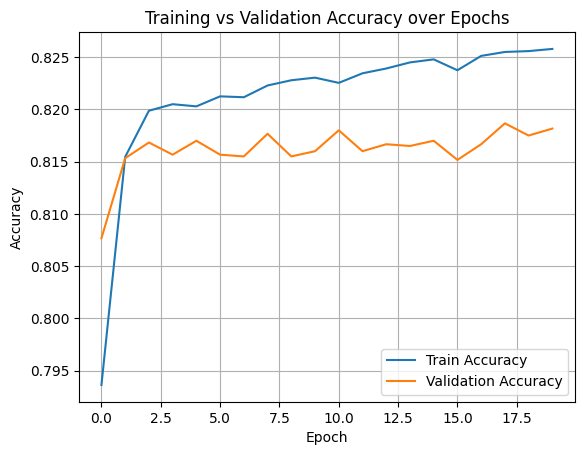

In [11]:
# =======================================
# 🧠 Accuracy over Epochs
# =======================================
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.savefig("training__validation_accuracy_over_epochs.png", dpi=300, bbox_inches='tight')
plt.show()